# 1. Integration errors

# (a) 

The error for trapezoidal integration scales as $(\Delta x)^2$ because we are essentially linearly interpolating between each point, so the error scales as linear interpolation does. In this case, it originates from the largest correction term being used in the Taylor expansion being the $(\Delta x)^2$ term. Similarly the Simpson's rule uses a cubic to fit the points, so it scales as cubic interpolation does, which is $(\Delta x)^4$.

# (b)



$$
I = I_1 + \epsilon_1
$$
$$
I = I_2 + \epsilon_2
$$

$$
Trapezoidal \; Rule \\
$$

$$
\epsilon = C * dx^2 \\
\epsilon_1 = C * dx^2 \\
\epsilon_2 = C * (2dx)^2 = C * 4dx^2 \\
\epsilon_1 / dx^2 = \epsilon_2 / 4dx^2 \\
\epsilon_2 = 4 * \epsilon_1 \\
$$

$$
\epsilon_1 =  (I_2 - I_1) + \epsilon_2 \\
\epsilon_1 = (I_2 - I_1) + 4 * \epsilon_1 \\
-3 * \epsilon_1 = I_2 - I_1 \\
\boxed{\epsilon_1 = (I_1 - I_2) / 3}  \\ 
$$

$$
Simpson \; Rule \\
$$

$$
\epsilon = C * dx^4 \\
\epsilon_1 = C * dx^4 \\
\epsilon_2 = C * (2dx)^4 = C * 16dx^4 \\
\epsilon_1 / dx^4 = \epsilon_2 / 16dx^4 \\
\epsilon_2 = 16 * \epsilon_1 \\
$$

$$
\epsilon_1 =  (I_2 - I_1) + \epsilon_2 \\
\epsilon_1 = (I_2 - I_1) + 16 * \epsilon_1 \\
-15 * \epsilon_1 = I_2 - I_1 \\
\boxed{\epsilon_1 = (I_1 - I_2) / 15}  \\ 
$$


# (c)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('hw2_data.txt')
x = data[:,0]
y = data[:,1]
# x_half = x[0:-1:2]
y_half = y[0::2]
# plt.plot(x,y)


# Integral should be ~ 2.5
# Bounds of integral, (1,2)

dx = x[1] - x[0]

# Trapezoidal Rule

# Integrate with dx
I_1_trap = dx * (y[0]/2 + np.sum(y[1:-1]) + y[-1]/2)

# Integrate with 2 * dx
I_2_trap = 2*dx * (y_half[0]/2 + np.sum(y_half[1:-1]) + y_half[-1]/2)

err_trap = (I_1_trap - I_2_trap) /3
err_trap_theor = dx**2

I_actual = 1.482974344768713
I_trap = I_1_trap
print("Integral, trapezoidal: " + str(I_trap))
print("Trap Error Calculated: " + str(err_trap))
print("Trap Error Theoretical: " + str(err_trap_theor))

Integral, trapezoidal: 1.4823547292600159
Trap Error Calculated: 0.0006157881000476243
Trap Error Theoretical: 0.0025000000000000044


In [2]:
# Simpson Rule

# Integrate with dx
I_1_simp = (dx/3) * (y[0]+ 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])

# Integrate with 2 * dx
I_2_simp = (2*dx/3) * (y_half[0]+ 4*np.sum(y_half[1:-1:2]) + 2*np.sum(y_half[2:-2:2]) + y_half[-1])

err_simp = (I_1_simp - I_2_simp) /15
err_simp_theor = dx**4

I_simp = I_1_simp
print("Integral, Simpson: " + str(I_simp))
print("Simp Error Calculated: " + str(err_simp))
print("Simp Error Theoretical: " + str(err_simp_theor))

Integral, Simpson: 1.4829705173600634
Simp Error Calculated: 4.3799084543512855e-06
Simp Error Theoretical: 6.250000000000022e-06


The Simpson's error does seem to scale as expected, with $\Delta x^4$, but the trapezoidal rule error is about 4 times smaller than the error I would expect based on the accuracy of $\Delta x^2$

# (d)

In [3]:
print("Actual Error Trap: " + str(I_actual - I_1_trap))
print("Actual Error Simp: " + str(I_actual - I_1_simp))

Actual Error Trap: 0.0006196155086970467
Actual Error Simp: 3.82740864957043e-06


The error estimation is fairly good, both have slight variation, but are well within the same order of magnitude. 

# 2. Chemical potential of a Fermi gas

# (a)

Simplified Integral: 

$$


\frac{N}{V} = \frac{4}{\sqrt{\pi}} n_Q \int_{0}^{\infty} \frac{x^{1/2}}{1 + e^{x - \frac{\mu}{k_BT}}} dx
$$

In [4]:
import scipy 
from scipy.integrate import quad

def integrand(x,mu_k_T):
    return 4 / np.sqrt(np.pi) * x**(1/2) / (1 + np.exp(x - mu_k_T))
def intg(mu_k_T):
    return quad(integrand, 0, np.inf, args=mu_k_T)

/var/folders/bm/3sg547cn5lnbz135hzdjm74c0000gn/T/ipykernel_33419/1864907911.py:5: RuntimeWarning: overflow encountered in exp
  return 4 / np.sqrt(np.pi) * x**(1/2) / (1 + np.exp(x - mu_k_T))


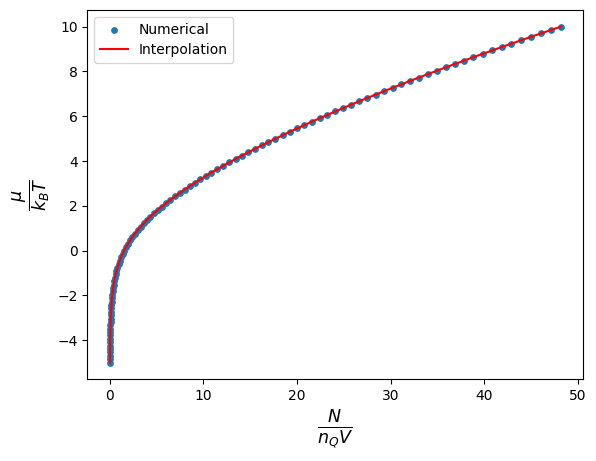

In [5]:
mu_k_T = np.linspace(-5,10,100)
int_vec = np.vectorize(intg)
int_arr = int_vec(mu_k_T)
int_vals = int_arr[0]
int_err = int_arr[1]
int_vals = int_vals[~np.isnan(int_vals)]
mu_k_T = mu_k_T[~np.isnan(int_vals)]


interp = scipy.interpolate.interp1d(int_vals, mu_k_T)
int_vals_fine = np.linspace(np.min(int_vals),np.max(int_vals),2000)

interp_vals = interp(int_vals_fine)

plt.scatter(int_vals, mu_k_T, s=15, label="Numerical")
plt.plot(int_vals_fine, interp_vals, 'r', label="Interpolation")
plt.xlabel(r'$\frac{N}{n_QV}$', fontsize=18)
plt.ylabel(r'$\frac{\mu}{k_BT}$', fontsize=18)
plt.yscale('linear')
plt.legend()



# (b)

For linear interpolation, as I have used, the error goes as $\frac{1}{N^2}$. There is also an error associated with the integration. This error is conveniently output as an array by np.integrate.quad. We can take the average of this integration error and sum it with the interpolation error to get an idea of the total error. The interpolation error dominates compared to the integration error.




In [6]:
int_err_avg = np.mean(int_err)
Num = 100 # Number of muk_B/T samples
interp_err = 1 / (Num**2)
total_err = int_err_avg + interp_err
print("Total error is approx: " + str(total_err))

Total error is approx: 0.00010005642111753081


# (c)

Non-degenerate: 

$\frac{\mu}{k_BT} = ln(\frac{n}{2n_Q})$

Degenerate: 

After subsituting $p_F$ and rearranging:

$\frac{\mu}{k_BT} = (\frac{3\sqrt{\pi}}{8}\frac{n}{n_Q})^{\frac{2}{3}}$


/var/folders/bm/3sg547cn5lnbz135hzdjm74c0000gn/T/ipykernel_33419/1864907911.py:5: RuntimeWarning: overflow encountered in exp
  return 4 / np.sqrt(np.pi) * x**(1/2) / (1 + np.exp(x - mu_k_T))


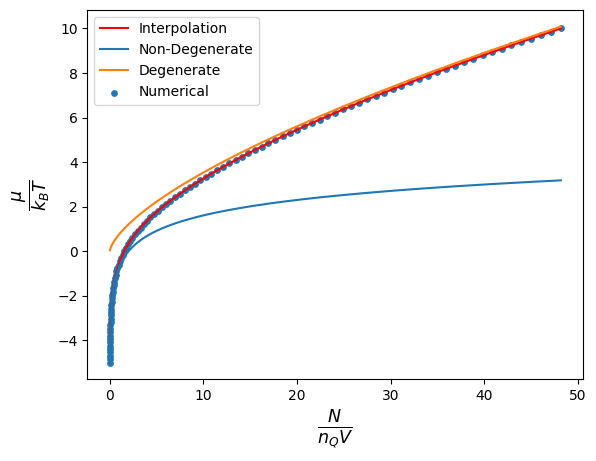

In [7]:
mu_k_T = np.linspace(-5,10,100)
int_vec = np.vectorize(intg)
int_arr = int_vec(mu_k_T)
int_vals = int_arr[0]
int_err = int_arr[1]
int_err_avg = np.mean(int_err)
int_vals = int_vals[~np.isnan(int_vals)]
mu_k_T = mu_k_T[~np.isnan(int_vals)]


interp = scipy.interpolate.interp1d(int_vals, mu_k_T)
int_vals_fine = np.linspace(np.min(int_vals),np.max(int_vals),2000)

interp_vals = interp(int_vals_fine)
mu_k_T_nondeg = np.log(int_vals_fine/2)
mu_k_T_deg = ((3/8 * np.sqrt(np.pi)) * int_vals_fine)**(2/3)
plt.plot(int_vals_fine, interp_vals, 'r', label="Interpolation")
plt.plot(int_vals_fine,mu_k_T_nondeg, label='Non-Degenerate')
plt.plot(int_vals_fine, mu_k_T_deg, label='Degenerate')
plt.scatter(int_vals, mu_k_T, s=15, label="Numerical")
plt.xlabel(r'$\frac{N}{n_QV}$', fontsize=18)
plt.ylabel(r'$\frac{\mu}{k_BT}$', fontsize=18)
plt.legend()
plt.show()


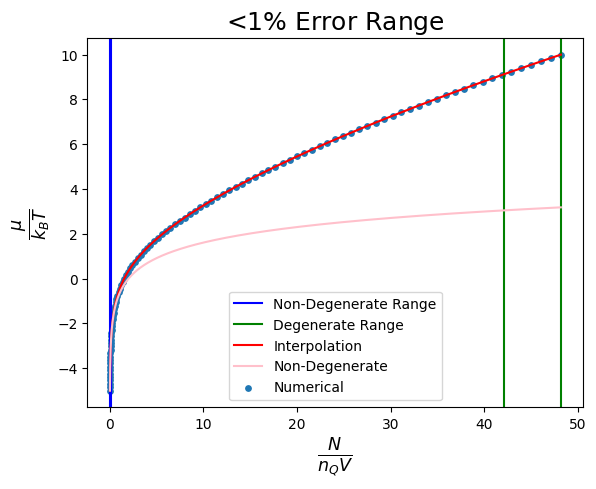

In [8]:
def err_func(mu_k_T_vals):
    return np.abs(np.abs(mu_k_T_vals - interp_vals) / (interp_vals))

mu_k_T_nondeg_err = err_func(mu_k_T_nondeg)
indices = np.where(mu_k_T_nondeg_err <= 0.01)
mu_k_T_nondeg_range = int_vals_fine[indices]
mu_k_T_nondeg_max = np.max(mu_k_T_nondeg_range)
mu_k_T_nondeg_min = np.min(mu_k_T_nondeg_range)

mu_k_T_deg_err = err_func(mu_k_T_deg)
indices = np.where(mu_k_T_deg_err <= 0.01)
mu_k_T_deg_range = int_vals_fine[indices]
mu_k_T_deg_max = np.max(mu_k_T_deg_range)
mu_k_T_deg_min = np.min(mu_k_T_deg_range)

plt.axvline(x = mu_k_T_nondeg_max, color = 'b', label='Non-Degenerate Range')
plt.axvline(x = mu_k_T_nondeg_min, color = 'b')
plt.axvline(x = mu_k_T_deg_max, color = 'g', label='Degenerate Range')
plt.axvline(x = mu_k_T_deg_min, color = 'g')
mu_k_T_nondeg = np.log(int_vals_fine/2)
mu_k_T_deg = ((3/8 * np.sqrt(np.pi)) * int_vals_fine)**(2/3)
plt.plot(int_vals_fine, interp_vals, 'r', label="Interpolation")
plt.plot(int_vals_fine,mu_k_T_nondeg, 'pink', label='Non-Degenerate')
# plt.plot(int_vals_fine, mu_k_T_deg, label='Degenerate')
plt.scatter(int_vals, mu_k_T, s=15, label="Numerical")
plt.xlabel(r'$\frac{N}{n_QV}$', fontsize=18)
plt.ylabel(r'$\frac{\mu}{k_BT}$', fontsize=18)
plt.legend()
plt.title('<1$\%$ Error Range',fontsize=18)
plt.show()

In [9]:
mu_k_T_nondeg_err = err_func(mu_k_T_nondeg)
indices = np.where(mu_k_T_nondeg_err <= 0.01)
mu_k_T_nondeg_range = int_vals_fine[indices]
mu_k_T_nondeg_max = np.max(mu_k_T_nondeg_range)
mu_k_T_nondeg_min = np.min(mu_k_T_nondeg_range)

mu_k_T_deg_err = err_func(mu_k_T_deg)
indices = np.where(mu_k_T_deg_err <= 0.01)
mu_k_T_deg_range = int_vals_fine[indices]
mu_k_T_deg_max = np.max(mu_k_T_deg_range)
mu_k_T_deg_min = np.min(mu_k_T_deg_range)

print("Degenerate range: " + str(mu_k_T_deg_min) + "-" + str(mu_k_T_deg_max))
print("Non-degenerate range: " + str(mu_k_T_nondeg_min) + "-" + str(mu_k_T_nondeg_max))

Degenerate range: 42.05045900919305-48.169313929275155
Non-degenerate range: 0.013443908628984784-0.13389380863060102


We see that the non-degenerate limit holds well for small number densities, while the degenerate limit holds for large number densities. 

# 3. Sampling the Maxwell-Boltzmann distribution


# (a)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as consts

m = 1 #6.6464731e-27 # kg
T = 1 #298 # K
k = 1 #1.38e-23

def MB_dist(v):
    return  (m / (2*np.pi * k * T))**(3/2) * 4 * np.pi * v**2 * np.exp(-m * v**2 / (2  * k * T))

def MaxwellBoltzmann(N, xmax):
    xx = np.linspace(0,xmax,int(1e6))
    ymax = np.max(MB_dist(xx))

    x = np.random.uniform(0,xmax, size=int(10*N))
    y = np.random.uniform(0,ymax,size=int(10*N))

    ind_acc = np.where(y <= MB_dist(x))
    ind_rej = np.where(y > MB_dist(x))


    rej_arr = [x[ind_rej], y[ind_rej], x[ind_acc], y[ind_acc]]
    return rej_arr 


4.5
Number of Samples = 3.786725 million


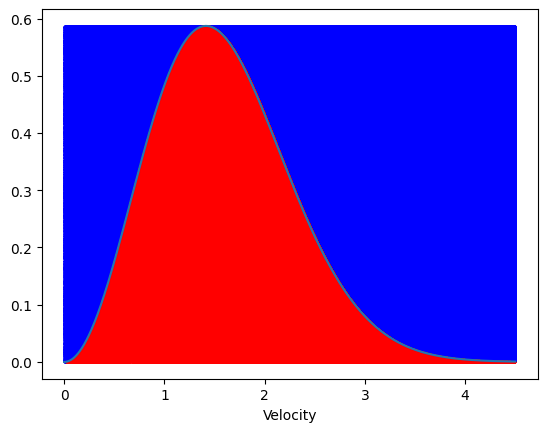

In [11]:
N = int(1e6)
xmax = 4.5 
print(xmax)   
xx = np.linspace(0,xmax,num=N)


rej_arr = MaxwellBoltzmann(N, xmax)
num_samp = len(rej_arr[2]) / 1e6
print("Number of Samples = " + str(num_samp) + " million")

plt.plot(rej_arr[0],rej_arr[1], 'bo', ms=0.1)
plt.plot(rej_arr[2],rej_arr[3], 'ro', ms=0.1)
xx = np.linspace(0,xmax,int(1e6))
plt.plot(xx, MB_dist(xx))
plt.xlabel('Velocity')
plt.show()



This algorithm is based on the rejection method. It samples a uniform distribution of points in the x and y plane, and evaluates why points have a y value below the function representing the probability distribution. I have made mine more efficient by first having it check what the maximum value of the probability function is, which allows me to set an upper limit on the y values generated by the uniform distribution. I also have the algorithm sample 10 times N, that way the number of accepted values is greater than or equal to N.

# (b)

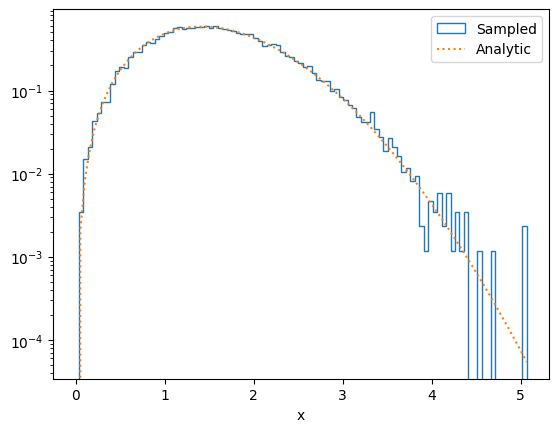

In [12]:
N = 1e6
xmax = 1000
rej_arr_hist = MaxwellBoltzmann(N, xmax)

vel_vals = rej_arr_hist[2]
plt.clf()
plt.hist(vel_vals, density=True, bins=100, histtype = 'step', label="Sampled")
xx = np.linspace(0.0,max(vel_vals),100)
plt.plot(xx, MB_dist(xx),':', label="Analytic")
plt.yscale('log')
plt.legend()
plt.xlabel('x')
plt.show()

# (c)

/Users/magnuslargent/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/magnuslargent/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


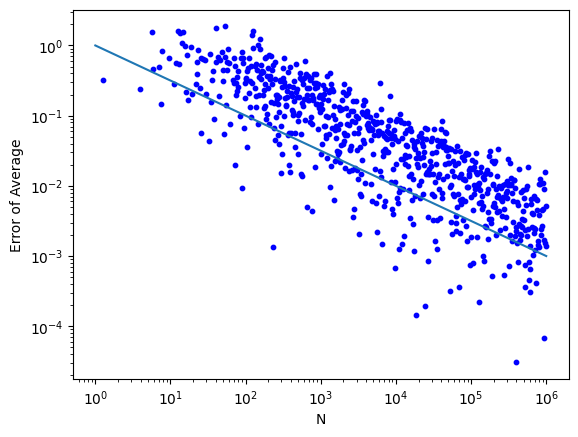

In [13]:
avg_vel_analy = (8 * k * T / (m * np.pi))**0.5

N = 1e6
xmax = 1000

Ns = np.geomspace(1,1e6,1000)
for N in Ns:
    rej_arr_hist = MaxwellBoltzmann(N, xmax)
    vel_vals = rej_arr_hist[2]
    avg_vel_samp = np.mean(vel_vals)
    avg_err = np.abs(avg_vel_analy - avg_vel_samp)
    plt.scatter(N,avg_err,s=10,c='blue')
    plt.xscale('log')
    plt.yscale('log')

plt.xlabel('N')
plt.ylabel('Error of Average')
plt.plot(Ns,Ns**-0.5)
plt.show()


Based on an approximate fit of the error, its seems that the error scales as $\frac{1}{\sqrt{N}}$